In [1]:
import pylab as pl
import numpy as np
from astropy.modeling.physical_models import BlackBody
from astropy import units as u
from astropy import constants
from astropy import visualization
pl.style.use('dark_background')
pl.rcParams['font.size'] = 18
visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f9bc210d050>

# More Radio Astronomy - Sensitivity Calculation

AST 4722 September 14, 2020

# Sensitivity
Radio telescope *sensitivity* is similar to that for optical telescopes: the noise goes down as $t^{1/2}$ and as $1/area$.

# Noise

The _thermal noise_ is the noise floor introduced by the fact that, at long wavelengths, everything glows.

The *Power per unit frequency* $P_\nu = P/\Delta \nu$ is the square of the signal.  It is always positive, and represents the astrophysical signal we're looking for.

$$T_N \equiv \frac{P_\nu}{k_B}$$

The Noise Temperature $T_N$ is the more common way to express the Power.

# Noise temperature?

The *continuous* signals we're measuring are "noise signals".  We usually distinguish *signal* from *noise*, so what does "Noise Temperature" mean?

The signals from a continuous source have random *phase* but non-random *amplitude*.  For example:

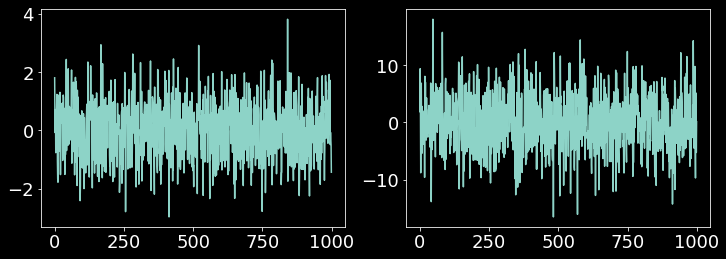

In [2]:
signal1 = np.random.randn(1000)
signal2 = np.random.randn(1000) * 5
pl.figure(figsize=(12,4))
pl.subplot(1,2,1).plot(signal1)
pl.subplot(1,2,2).plot(signal2)

# Noise Temperature

If our "signal" is just rapidly varying noise, to measure its amplitude, we square it, then take the average:

In [3]:
(signal1**2).mean(), (signal2**2).mean()

(0.9871909208381558, 24.74249003899926)

# Noise

The thermal noise level is:

$$\sigma_T \propto \frac{T_{sys}}{\sqrt{\Delta \nu \tau}}$$

where $\Delta \nu$ is the bandwidth, $\tau$ is the integration time, and $T_{sys}$ is the system temperature

# System Temperature

$$T_{sys} = T_{atmosphere} + T_{CMB} + T_{astrophysical source} + T_{spillover} + T_{receiver} + ...$$

The System Temperature defines the total noise of our system, and it is comprised of many parts.


# System Temperature

$T_{receiver}$ is intrinsic to the receiver system.  

# System Temperature

$T_{atmosphere}$ is the noise from the atmosphere, usually assumed to be 273 K times the optical depth $\tau$.  

At 20 cm, the atmosphere is nearly transparent, with $\tau<<1$, so $T_{atmosphere} \approx 0$

# System Temperature

$T_{spillover}$ is from radiation coming through the telescope structure - our telescope has holes, so the ground radiation actually peaks up through it.

We exclude most of this radiation using our *bandpass filter* that keeps out unwanted frequencies.

# System Temperature

$T_{CMB}$ is the CMB temperature of 2.73 degrees.  If we're looking up, it's there.

# System Temperature

$T_{astrophysical source}$ is the noise temperature added by whatever we're looking at.

It's usually *tiny* compared to everything else!

# System Temperature

How do we know the system temperature?

Usually we measure it by measuring some known source.  We use *calibration* measurements.

# System Gain

"Gain" is a frequently-used term that can take on many meanings.  Here we define it as:

$$P_\nu = G k T_{\rm sys}$$

i.e., the gain $G$ is the additional multicative factor needed to convert from power to system temperature.  

It is an "efficiency factor" that converts between the source brightness (which is intrinsic to the source) and the received power (which depends on your hardware)

# Signals, Temperatures, and Gain

When we measure on-sky signals, we just get a number from the SDR.  What does this number mean?

On face, we don't know - maybe an electronics guru could tell us approximately, but in practice, we just *measure* the gain by looking at a known source.

# Calibration: Measuring a known source

We have talked about three things we can look at:

 1. the Galaxy
 1. the Sun
 1. the Moon

From lots of other independent measurements, we have a pretty good idea of what signal the sun and moon provide.  We can use them as calibrators!

## Calibration: What do other telescopes do?

Our telescope is not a typical radio astronomy telescope used for research today, it is much smaller and less sensitive.

Big telescopes have to look at fainter targets.



Calibration approaches:
 * ALMA (big interferometer) looks at planets and asteroids, like Pluto, Uranus, and Ceres for its absolute calibration.  We know how warm these are.
 * The GBT (100m) sometimes looks at the moon and Jupiter
 * The VLA looks at "known" sources and... honestly I don't get how they know.
 * Medium-sized telescopes, like the Caltech Submillimeter Observatory (defunct), the James Clerk Maxwell Telescope, and the IRAM millimeter telescope use bright planets like Mars and sometimes Jupiter and Saturn
 * Some instruments will be calibrated with "hot load" / "cold load" calibration: have a human stand in front (T=309 K), then dip a block of material in liquid nitrogen (T=77 K) and wave it in front

# Calibration

We observe a known source, then we observe away from that source:

$$P_1 = G k_B (T_{sys} + T_{hot})$$
$$P_2 = G k_B (T_{sys} + T_{cold})$$

If you know both $T_{hot}$ and $T_{cold}$, and you measure $P_1$ and $P_2$, you can measure $T_{sys}$ and $G$:



First, rearrange to solve $T_{sys}$ for $P_2$:  

$$T_{sys} = \frac{P_2}{G k_B} - T_{cold}$$

then plug that into the $P_1$ equation to get:

$$G = \frac{P_1 - P_2}{k_B (T_{hot} - T_{cold})} $$

This "gain" will have units of Joules per Hertz or ergs/second/Hertz.

We often instead want to have our measurement in Janskies, erg / second / cm$^2$ / Hertz / steradian.

The "per centimeter squared" comes from the collecting area of our telescope.

The "per Hertz" is the bandwidth of our observation.

The "per steradian" is the area of our beam on the sky

In [10]:
u.Jy.to(u.erg/u.s/u.cm**2/u.Hz)

1e-23

# Source Equivalent Flux Density (SEFD)

The Power is proportional to the SEFD in Jy

$$T_{A} = \frac{S_\nu A_{eff}}{2 k_B} $$

Where $S_\nu$ is the flux of the target source in Janskies, and $A_{eff}$ is the *effective* collecting area of the telescope.  The factor of 2 comes from only receiving one of two polarizations of light.

# Effective Area

Our telescope has some area, but it also has some *inefficiency*.  Not every photon that hits the reflector makes it into our receiver.

# Prediction: What signal will we receive if we look at a star?

Let's say we look at Proxima Centauri.  

It is at a distance $D=1.3$ pc.  It has a radius of 0.15 $R_\odot$.  It has a temperature $T \approx 3000$ K.

What do we see?

This is the same calculation we used for the sun.  

 * We assume our beam area is $\pi (0.45 \lambda / Diameter)^2$ = 0.0113 steradians
 * The angular area of the star is $\pi (sin^{-1}(R / Distance))^2 \approx \pi (R/D)^2= 2.1\times10^{-17}$ steradians
 * The filling factor is $ff\sim10^{-15}$!!
 * The *brightness temperature* $T_B \sim 10^{-12}$ K.  We can't see that.